1. NumPy Operations

In [4]:
import numpy as np
import time
arr = np.arange(1, 1000001)

# vectorized
start = time.time()
squared_vectorized = arr ** 2
end = time.time()
print("Vectorized execution time:", end - start)

# loop
start = time.time()
squared_loop = []
for x in arr:
    squared_loop.append(x ** 2)
end = time.time()
print("Loop execution time:", end - start)

# comparison
print("Vectorized:", squared_vectorized[:5])
print("Loop:", squared_loop[:5])

Vectorized execution time: 0.0028448104858398438
Loop execution time: 0.10747694969177246
Vectorized: [ 1  4  9 16 25]
Loop: [np.int64(1), np.int64(4), np.int64(9), np.int64(16), np.int64(25)]


2. Dataset Loading

In [6]:
import pandas as pd
path = "/Users/zhaotanji/Desktop/starter_data.csv"
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


,category,value,date
0,A,10,2025-08-01
1,B,15,2025-08-02
2,A,12,2025-08-03
3,B,18,2025-08-04
4,C,25,2025-08-05


In [ ]:
3. summary statistics

In [13]:
# .describe for numeric columns
df.describe()

,value
count,10.000000
mean,17.600000
std,7.381659
min,10.000000
25%,12.250000
50%,14.500000
75%,23.250000
max,30.000000


In [17]:
# .groupby() aggregation
df.groupby("category")["value"].agg(["mean", "sum", "count"])

,mean,sum,count
category,,,
A,11.500000,46,4
B,15.666667,47,3
C,27.666667,83,3


4. save and plot

In [26]:
# save
import pandas as pd
summary = df.describe()
grouped = df.groupby("category")["value"].agg(["mean", "sum", "count"])
data_processed = pd.concat({"summary": summary, "grouped": grouped})
data_processed.to_csv("/Users/zhaotanji/Desktop/data/data_processed_summary.csv")

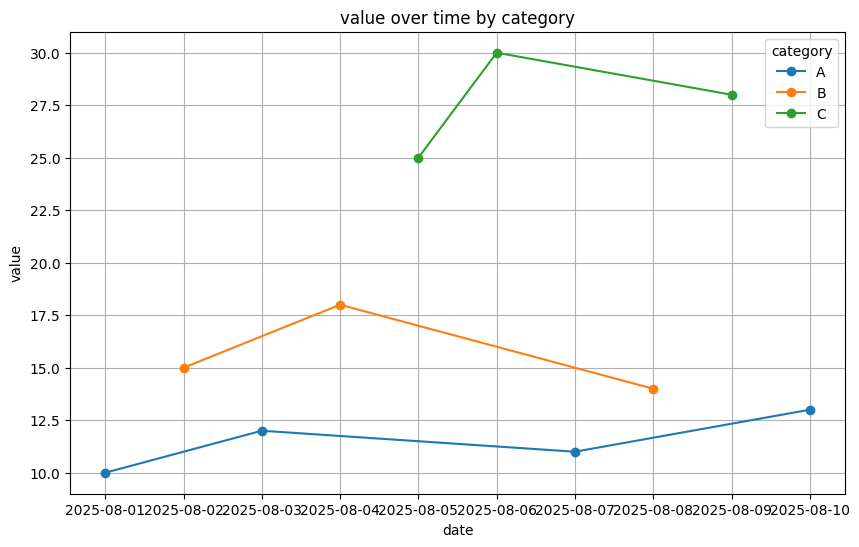

In [22]:
#plot
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

df["date"] = pd.to_datetime(df["date"])
plt.figure(figsize=(10,6))

for category, group in df.groupby("category"):
    plt.plot(group["date"], group["value"], marker="o", label=category)

plt.title("value over time by category")
plt.xlabel("date")
plt.ylabel("value")
plt.legend(title="category")
plt.grid(True)
plt.savefig("/Users/zhaotanji/Desktop/data/data_value_plot.png")
plt.show()

In [23]:
def get_summary_stats(df):
    """
    Calculate summary statistics and groupby aggregation for a dataframe.
    """

    summary = df.describe(include="all")
    group_summary = df.groupby("category")["value"].mean()
    
    return summary, group_summary